> # K-mean 
## Introducción a la Ciencia de Datos.

### Por William F. Tandazo Vargas 


> ### Librerias

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import scale

> ### Datos


In [69]:
flight=pd.read_csv("../Scripts/data/flights.txt", sep="|")

In [4]:
flight.head(5)

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,...,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles


In [70]:
flight = flight.dropna()

In [78]:
# Subset - Flights
flight_n = flight[["AIRLINECODE", "DEPTIME","ARRTIME","DISTANCE"]]

flight_n.dtypes

AIRLINECODE     object
DEPTIME        float64
ARRTIME        float64
DISTANCE        object
dtype: object

In [79]:
flight_n['DISTANCE'] = flight_n['DISTANCE'].str.split(" ",expand=True)[0].astype("float")

C:\Users\willi\AppData\Local\Temp\ipykernel_25408\3068695077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_n['DISTANCE'] = flight_n['DISTANCE'].str.split(" ",expand=True)[0].astype("float")


In [80]:
flight_n

,AIRLINECODE,DEPTIME,ARRTIME,DISTANCE
0,WN,1425.0,1652.0,580.0
1,CO,1136.0,1435.0,744.0
2,WN,1338.0,1620.0,718.0
3,WN,1925.0,1948.0,487.0
4,CO,1453.0,1747.0,744.0
...,...,...,...,...
1191800,EV,1348.0,1503.0,721.0
1191801,DL,2147.0,2317.0,731.0
1191802,DL,1617.0,1737.0,731.0
1191803,EV,1514.0,1655.0,508.0


> ### Aereolinas con Mas Vuelos

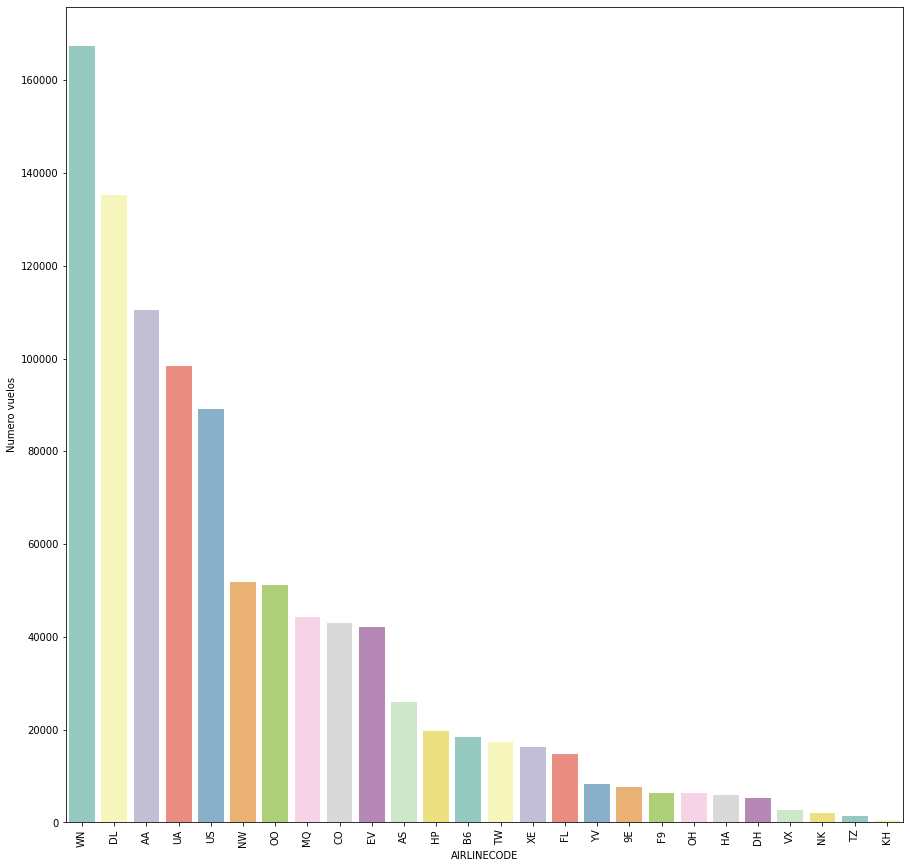

In [99]:
plt.figure(figsize = (15,15))
sns.countplot(x = "AIRLINECODE", palette = "Set3",data = flight_n,order = flight_n['AIRLINECODE'].value_counts().index)
plt.xticks(rotation = 90)
plt.ylabel("Numero vuelos")
plt.show()

> ### Vuelos de Aereolinas vs Distancias recorridas por la Aereolina

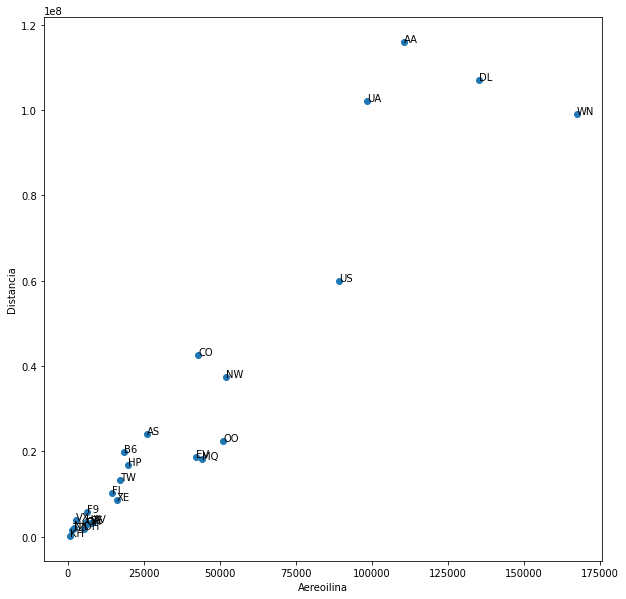

In [100]:
acum_vuelos = flight_n['AIRLINECODE'].value_counts()
acum_vuelos.sort_index(inplace=True)
acum_distancia = flight_n.groupby("AIRLINECODE").sum()["DISTANCE"]
acum_distancia.sort_index(inplace=True)

x = acum_vuelos.values
y = acum_distancia.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Aereoilina")
plt.ylabel("Distancia")
for i, txt in enumerate(acum_vuelos.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()

In [101]:
df_vuelos = acum_vuelos + acum_distancia
df_vuelos.sort_values(ascending = False, inplace = True)
acum_vuelos.sort_index(inplace=True)
acum_distancia.sort_index(inplace = True)
x = acum_vuelos.values
y = acum_distancia.values

In [102]:
X = np.array(list(zip(x,y)))

In [103]:
sc = StandardScaler()

In [104]:
sc.fit(X)

StandardScaler()

In [105]:
X_norm = sc.transform(X)
X_norm

array([[-0.68492953, -0.71050449],
       [ 1.62343235,  2.43180264],
       [-0.27157833, -0.12751662],
       [-0.44206691, -0.2460778 ],
       [ 0.10658449,  0.38837624],
       [-0.73558014, -0.74486371],
       [ 2.17737996,  2.18590739],
       [ 0.0884517 , -0.28011402],
       [-0.71352008, -0.63483882],
       [-0.52676138, -0.51022416],
       [-0.72233962, -0.70261163],
       [-0.41457599, -0.33082709],
       [-0.8421327 , -0.79300169],
       [ 0.13652154, -0.2928869 ],
       [-0.81031056, -0.74175877],
       [ 0.30864835,  0.24523216],
       [-0.71513588, -0.71420656],
       [ 0.29195182, -0.17202773],
       [-0.46717902, -0.4248406 ],
       [-0.82451607, -0.75318629],
       [ 1.34998187,  2.04486035],
       [ 1.14428248,  0.87167893],
       [-0.7951625 , -0.6867955 ],
       [ 2.90080627,  1.96052758],
       [-0.491573  , -0.55892843],
       [-0.67067914, -0.70317449]])

In [106]:
clusters = np.arange(2,10)

In [107]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [108]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})
eva

,K,inercia
0,2,8.737225
1,3,4.474508
2,4,2.864000
3,5,1.729221
4,6,1.070301
5,7,0.685536
6,8,0.398465
7,9,0.283062


<AxesSubplot:xlabel='K', ylabel='inercia'>

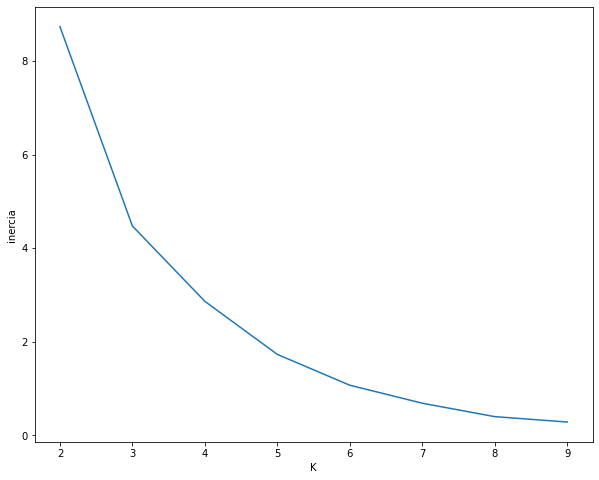

In [109]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = eva, x = "K", y = "inercia")

In [110]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [111]:
kmeans.fit(X_norm)

KMeans(n_clusters=4, random_state=0)

In [112]:
kmeans.cluster_centers_

array([[-0.6570975 , -0.617056  ],
       [ 2.01290011,  2.15577449],
       [ 0.11009659, -0.03982281],
       [ 1.14428248,  0.87167893]])

In [114]:
df_vuelos["cluster"] = kmeans.labels_

In [115]:
df_vuelos.head()

AA    116097653.0
DL    107288928.0
UA    102185161.0
WN     99224741.0
US     60031256.0
dtype: object

> ### Gráfico KMeans - Aereolinas

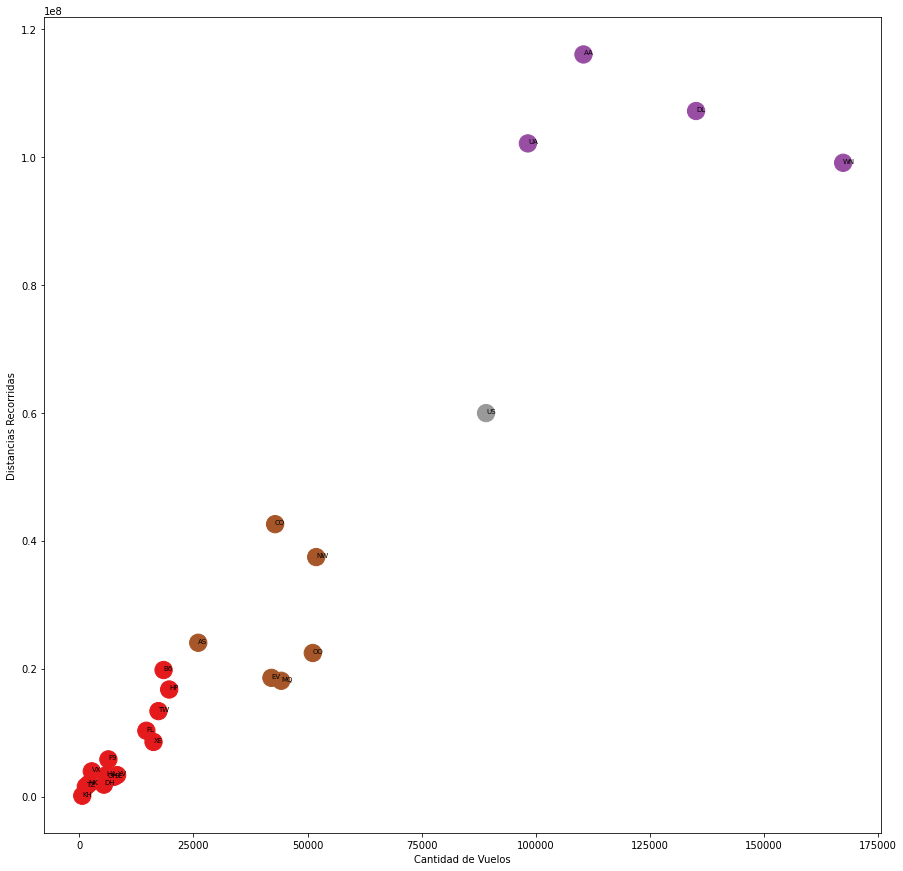

In [118]:
plt.figure(figsize = (15,15))
plt.xlabel("Cantidad de Vuelos")
plt.ylabel("Distancias Recorridas")
plt.scatter(X[:, 0], X[:, 1], c=df_vuelos["cluster"] , s=300, cmap='Set1')
for i, txt in enumerate(acum_vuelos.index.values):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()

> Podemos observar que las 4 aereolinas que se encuentran en color morado se caracterizan por ser las Aereolinas de mayor transito aereo, es decir, las que mayor distancia recorren por vuelo. El grupo de las Aereolinas de color rojo son las aereolinas de menor transito aereo, estas recorren menos distancias en los vuelos que ofrecen. A lado del cluster rojo podemos observar las aereolinas que recorren mas disntancia que el cluster rojo pero su cantidad de vuelo se caracteriza por estar entre los 25000 a 50000. Existe una sola aerolina que en su es un cluster el cual mediante el grafico se encuentra como "centroide". Es decir, esta realiza una cantidad media de vuelos y disntancias en comparacion a las otras aereolinas registradas 